<a href="https://colab.research.google.com/github/racoope70/daytrading-with-ml/blob/main/train__XGBoost_rf_multi_stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install stable-baselines3[extra] gymnasium gym-anytrading yfinance xgboost joblib tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.2/172.2 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 833.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 49.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.5/184.5 kB 13.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlin

In [3]:
!pip uninstall -y dask cudf-cu12 cuml-cu12 rapids-dask-dependency pylibraft-cu12 pylibcudf-cu12 numba stable-baselines3 gymnasium gym-anytrading

Found existing installation: dask 2024.12.1
Uninstalling dask-2024.12.1:
  Successfully uninstalled dask-2024.12.1
Found existing installation: cudf-cu12 25.2.1
Uninstalling cudf-cu12-25.2.1:
  Successfully uninstalled cudf-cu12-25.2.1
Found existing installation: cuml-cu12 25.2.1
Uninstalling cuml-cu12-25.2.1:
  Successfully uninstalled cuml-cu12-25.2.1
Found existing installation: rapids-dask-dependency 25.2.0
Uninstalling rapids-dask-dependency-25.2.0:
  Successfully uninstalled rapids-dask-dependency-25.2.0
Found existing installation: pylibraft-cu12 25.2.0
Uninstalling pylibraft-cu12-25.2.0:
  Successfully uninstalled pylibraft-cu12-25.2.0
Found existing installation: pylibcudf-cu12 25.2.1
Uninstalling pylibcudf-cu12-25.2.1:
  Successfully uninstalled pylibcudf-cu12-25.2.1
Found existing installation: numba 0.60.0
Uninstalling numba-0.60.0:
  Successfully uninstalled numba-0.60.0
Found existing installation: stable_baselines3 2.6.0
Uninstalling stable_baselines3-2.6.0:
  Successfu

In [4]:
!pip install --upgrade --force-reinstall \
    dask==2024.11.2 \
    rapids-dask-dependency==24.12.0 \
    cudf-cu12==24.12.0 \
    cuml-cu12==24.12.0 \
    pylibraft-cu12==24.12.0 \
    pylibcudf-cu12==24.12.0 \
    numba==0.61.0 \
    stable-baselines3[extra] \
    gymnasium==0.29.1 \
    gym-anytrading==2.0.0


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached gym_anytrading-2.0.0-py3-none-any.whl.metadata (292 bytes)
  Using cached stable_baselines3-2.6.0-py3-none-any.whl.metadata (4.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.7 MB/s eta 

In [1]:
import cudf, cuml, dask, stable_baselines3, gymnasium
import numba, pandas, numpy, scipy

print("cuDF Version:", cudf.__version__)
print("cuML Version:", cuml.__version__)
print("Dask Version:", dask.__version__)
print("Stable Baselines3 Installed:", stable_baselines3.__version__)
print("Gymnasium Version:", gymnasium.__version__)
print("NumPy Version:", numpy.__version__)
print("SciPy Version:", scipy.__version__)
print("Pandas Version:", pandas.__version__)

/usr/local/lib/python3.11/dist-packages/cudf/utils/_ptxcompiler.py:64: UserWarning: Error getting driver and runtime versions:

stdout:



stderr:

Traceback (most recent call last):
  File "<string>", line 4, in <module>
  File "/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/cudadrv/driver.py", line 272, in __getattr__
    raise CudaSupportError("Error at driver init: \n%s:" %
numba.cuda.cudadrv.error.CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBA_CUDA_DRIVER
with the file path of the CUDA driver shared library.
:


Not patching Numba
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Failed to dlopen libcuda.so.1
  warnings.warn(str(e))


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

cuDF Version: 24.12.00
cuML Version: 24.12.00
Dask Version: 2024.11.2
Stable Baselines3 Installed: 2.6.0
Gymnasium Version: 0.29.1
NumPy Version: 2.1.3
SciPy Version: 1.15.2
Pandas Version: 2.2.3


In [2]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [3]:
import tensorflow as tf
print("TF Version:", tf.__version__)
print("Available GPUs:", tf.config.list_physical_devices('GPU'))

TF Version: 2.18.0
Available GPUs: []


In [4]:
Step 2: Set Environment Paths for CUDA 11.8
import os
os.environ['CUDA_HOME'] = '/usr/local/cuda-11.8'
os.environ['PATH'] += ':/usr/local/cuda-11.8/bin'
os.environ['LD_LIBRARY_PATH'] += ':/usr/local/cuda-11.8/lib64'

In [5]:

try:
    df = cudf.DataFrame({'col1': [1, 2, 3], 'col2': [4, 5, 6]})
    print("cuDF is working and using GPU!")
except Exception as e:
    print(f"cuDF GPU check failed: {e}")



cuDF GPU check failed: Function "cuInit" not found


In [6]:
import os
import time
import gc
import numpy as np
import pandas as pd
import xgboost as xgb
import yfinance as yf
import gymnasium as gym  Use gymnasium instead of gym
import gym_anytrading
from gymnasium.envs.registration import registry, register
import matplotlib.pyplot as plt

Prevent cuDF from taking all GPU memory
os.environ["RAPIDS_NO_INITIALIZE"] = "1"

RAPIDS & GPU-based Libraries (Try-Except to Avoid CPU Errors)
try:
    import cudf
    import cuml
    from cuml.ensemble import RandomForestClassifier
    from cuml.metrics import accuracy_score
    GPU_AVAILABLE = True
    print("cuDF & cuML are available and running on GPU.")
except ImportError:
    print(" cuDF/cuML not available. Switching to CPU mode.")
    GPU_AVAILABLE = False

Reinforcement Learning & Trading
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv

Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

TensorFlow & GPU Optimization
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

Ensure TensorFlow GPU Memory Allocation is Configured
gpus = tf.config.list_physical_devices("GPU")
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)  Prevents full allocation
        print("TensorFlow GPU memory growth enabled")
    except RuntimeError as e:
        print(f" TensorFlow GPU memory issue: {e}")

Google Drive Access (for Colab)
from google.colab import drive


cuDF & cuML are available and running on GPU.


In [7]:
#Ticker List and CONFIG
ticker_list = [
    'AAPL', 'TSLA', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'META', 'BRK-B', 'JPM', 'JNJ',
    'XOM', 'V', 'PG', 'UNH', 'MA', 'HD', 'LLY', 'MRK', 'PEP', 'KO',
    'BAC', 'ABBV', 'AVGO', 'PFE', 'COST', 'CSCO', 'TMO', 'ABT', 'ACN', 'WMT',
    'MCD', 'ADBE', 'DHR', 'CRM', 'NKE', 'INTC', 'QCOM', 'NEE', 'AMD', 'TXN',
    'AMGN', 'UPS', 'LIN', 'PM', 'UNP', 'BMY', 'LOW', 'RTX', 'CVX', 'IBM',
    'GE', 'SBUX', 'ORCL'
]

strategy_name = "sac_ppo_td3_multi_stock_v1"

CONFIG = {
    'symbols': [],
    'period': '720d',
    'interval': '1h',
    'target': 'Target',
    'sharpe_threshold': 1.5,
    'return_threshold': 1.25,
    'strategy_name': strategy_name
}

#Download Function
def download_stock_data(ticker, period="720d", interval="1h", max_retries=5):
    for attempt in range(1, max_retries + 1):
        try:
            print(f"Attempt {attempt}: Downloading {ticker}...")
            df = yf.download(ticker, period=period, interval=interval)
            if not df.empty:
                df.reset_index(inplace=True)
                df['Symbol'] = ticker
                return df
            raise ValueError("Empty data")
        except Exception as e:
            print(f"Error: {e}. Retrying in {attempt * 5} sec...")
            time.sleep(attempt * 5)
    print(f"Failed to download {ticker}")
    return None

In [8]:
import os
import time
import numpy as np
import pandas as pd
import yfinance as yf

Ticker List
ticker_list = [
    'AAPL', 'TSLA', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'META', 'BRK-B', 'JPM', 'JNJ',
    'XOM', 'V', 'PG', 'UNH', 'MA', 'HD', 'LLY', 'MRK', 'PEP', 'KO',
    'BAC', 'ABBV', 'AVGO', 'PFE', 'COST', 'CSCO', 'TMO', 'ABT', 'ACN', 'WMT',
    'MCD', 'ADBE', 'DHR', 'CRM', 'NKE', 'INTC', 'QCOM', 'NEE', 'AMD', 'TXN',
    'AMGN', 'UPS', 'LIN', 'PM', 'UNP', 'BMY', 'LOW', 'RTX', 'CVX', 'IBM',
    'GE', 'SBUX', 'ORCL'
]

CONFIG = {
    'period': '720d',
    'interval': '1h',
    'strategy_name': "sac_ppo_td3_multi_stock_v1"
}

1.Download Stock Data
def download_stock_data(ticker, period="720d", interval="1h", max_retries=5):
    for attempt in range(1, max_retries + 1):
        try:
            print(f"Attempt {attempt}: Downloading {ticker}...")
            df = yf.download(ticker, period=period, interval=interval)
            if not df.empty:
                df.reset_index(inplace=True)
                df['Symbol'] = ticker
                return df
            raise ValueError("Empty data")
        except Exception as e:
            print(f"Error: {e}. Retrying in {attempt * 5} sec...")
            time.sleep(attempt * 5)
    print(f"Failed to download {ticker}")
    return None

2.Feature Engineering
def compute_enhanced_features(df):
    df = df.copy()
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = df.columns.get_level_values(0)
    df = df.loc[:, ~df.columns.duplicated()]

    df['SMA_20'] = df['Close'].rolling(20).mean()
    df['STD_20'] = df['Close'].rolling(20).std()
    df['Upper_Band'] = df['SMA_20'] + 2 * df['STD_20']
    df['Lower_Band'] = df['SMA_20'] - 2 * df['STD_20']
    df['Lowest_Low'] = df['Low'].rolling(14).min()
    df['Highest_High'] = df['High'].rolling(14).max()
    denom = (df['Highest_High'] - df['Lowest_Low']).replace(0, np.nan)
    df['Stoch'] = ((df['Close'] - df['Lowest_Low']) / denom) * 100
    df['ROC'] = df['Close'].pct_change(10)
    df['OBV'] = (np.sign(df['Close'].diff()) * df['Volume']).cumsum()
    typical_price = (df['High'] + df['Low'] + df['Close']) / 3
    df['CCI'] = (typical_price - typical_price.rolling(20).mean()) / (0.015 * typical_price.rolling(20).std())
    df['PROC'] = ((df['Close'] - df['Close'].shift(12)) / df['Close'].shift(12)) * 100
    df['Rolling_Mean_50'] = df['Close'].rolling(50).mean()
    df['Expanding_Mean'] = df['Close'].expanding().mean()
    df['EMA_10'] = df['Close'].ewm(span=10).mean()
    df['EMA_50'] = df['Close'].ewm(span=50).mean()
    df['MACD_Line'] = df['Close'].ewm(span=12).mean() - df['Close'].ewm(span=26).mean()
    df['MACD_Signal'] = df['MACD_Line'].ewm(span=9).mean()
    df['MACD_Hist'] = df['MACD_Line'] - df['MACD_Signal']
    delta = df['Close'].diff()
    gain = delta.where(delta > 0, 0).rolling(14).mean()
    loss = -delta.where(delta < 0, 0).rolling(14).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))
    df['True_Range'] = df[['High', 'Low', 'Close']].apply(
        lambda x: max(x.iloc[0] - x.iloc[1], abs(x.iloc[0] - x.iloc[2]), abs(x.iloc[1] - x.iloc[2])), axis=1)
    df['ATR'] = df['True_Range'].rolling(14).mean()
    df['+DM'] = np.where((df['High'].diff() > df['Low'].diff()) & (df['High'].diff() > 0), df['High'].diff(), 0)
    df['-DM'] = np.where((df['Low'].diff() > df['High'].diff()) & (df['Low'].diff() > 0), df['Low'].diff(), 0)
    df['+DI'] = 100 * df['+DM'].rolling(14).mean() / df['ATR']
    df['-DI'] = 100 * df['-DM'].rolling(14).mean() / df['ATR']
    df['ADX'] = abs(df['+DI'] - df['-DI']).rolling(14).mean()
    df['Volume_Avg'] = df['Volume'].rolling(20).mean()
    df['Volume_Change'] = df['Volume'].pct_change()
    df['Volume_Change_MA'] = df['Volume_Change'].rolling(10).mean()
    df['Volume_Change_Ratio'] = df['Volume_Change'] / df['Volume_Change'].shift(1)
    df['Relative_Volume'] = df['Volume'] / df['Volume_Avg']
    df['Trailing_Stop'] = np.minimum(df['Close'] * 0.985, df['Close'] - (df['ATR'] * 0.3))
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(inplace=True)
    return df

3.Label Creation
def create_trading_labels(df, label_type="multiclass", return_threshold=0.02, shift_period=10):
    df = df.copy()
    df['Future_Close'] = df['Close'].shift(-shift_period)
    df['Return'] = (df['Future_Close'] - df['Close']) / df['Close']

    if label_type == "multiclass":
        df['Target'] = np.select(
            [df['Return'] > return_threshold, df['Return'] < -return_threshold],
            [1, -1],
            default=0
        )
    elif label_type == "binary":
        df['Target'] = np.where(df['Return'] > return_threshold, 1, 0)
    elif label_type == "regression":
        df['Target'] = df['Return']
    else:
        raise ValueError("Invalid label_type. Use 'multiclass', 'binary', or 'regression'.")

    df.drop(columns=["Future_Close", "Return"], inplace=True, errors='ignore')
    return df

4.Run Pipeline for All Stocks
all_dfs = []

for ticker in ticker_list:
    df_single = download_stock_data(ticker, period=CONFIG['period'], interval=CONFIG['interval'])
    if df_single is not None:
        try:
            df_features = compute_enhanced_features(df_single)
            df_labeled = create_trading_labels(df_features, label_type="multiclass")
            all_dfs.append(df_labeled)
        except Exception as e:
            print(f"Feature engineering or labeling failed for {ticker}: {e}")
    else:
        print(f"Failed to download {ticker}")

5. Combine & Save
if all_dfs:
    df = pd.concat(all_dfs, ignore_index=True)
    print(f"Combined dataset created with shape: {df.shape}")
    df.to_csv("multi_stock_feature_engineered_dataset.csv", index=False)
    print("Saved locally as multi_stock_feature_engineered_dataset.csv")

    Google Drive path (optional)
    drive_path = "/content/drive/MyDrive/trading_data/"
    os.makedirs(drive_path, exist_ok=True)
    df.to_csv(os.path.join(drive_path, "multi_stock_feature_engineered_dataset.csv"), index=False)
    print(f"Also saved to: {drive_path}multi_stock_feature_engineered_dataset.csv")
else:
    print("No data was processed.")


Attempt 1: Downloading AAPL...
YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading TSLA...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading MSFT...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading GOOGL...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading AMZN...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading NVDA...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading META...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading BRK-B...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading JPM...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading JNJ...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading XOM...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading V...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading PG...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading UNH...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading MA...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading HD...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading LLY...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading MRK...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading PEP...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading KO...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading BAC...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading ABBV...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading AVGO...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading PFE...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading COST...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading CSCO...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading TMO...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading ABT...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading ACN...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading WMT...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading MCD...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading ADBE...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading DHR...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading CRM...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading NKE...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading INTC...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading QCOM...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading NEE...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading AMD...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading TXN...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading AMGN...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading UPS...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading LIN...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading PM...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading UNP...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading BMY...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading LOW...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading RTX...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading CVX...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading IBM...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading GE...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading SBUX...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading ORCL...


[*********************100%***********************]  1 of 1 completed


Combined dataset created with shape: (262867, 40)
Saved locally as multi_stock_feature_engineered_dataset.csv
Also saved to: /content/drive/MyDrive/trading_data/multi_stock_feature_engineered_dataset.csv


In [9]:
#Attempt to use cuML (GPU) first, then fallback to sklearn (CPU)
import os
import gc
import json
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

try:
    import cudf
    from cuml.ensemble import RandomForestClassifier as CUML_RF
    from cuml.metrics import accuracy_score as cuml_accuracy
    GPU_AVAILABLE = True
    print("cuML + cuDF available. Using GPU for Random Forest.")
except ImportError:
    from sklearn.ensemble import RandomForestClassifier as SK_RF
    from sklearn.metrics import accuracy_score as sklearn_accuracy
    GPU_AVAILABLE = False
    print("cuML not available. Using CPU (scikit-learn).")

#Define Features & Target
features = ['SMA_20', 'STD_20', 'Upper_Band', 'Lower_Band', 'Stoch']
X = df[features]
y = df['Target']

#GPU conversion if available
if GPU_AVAILABLE:
    try:
        X = cudf.DataFrame.from_pandas(X)
        y = cudf.Series(y.values)
        print("Data moved to GPU.")
    except Exception as e:
        print(f"GPU conversion failed: {e}. Falling back to CPU.")
        from sklearn.ensemble import RandomForestClassifier as SK_RF
        from sklearn.metrics import accuracy_score as sklearn_accuracy
        X = df[features]
        y = df['Target']
        GPU_AVAILABLE = False

#Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)
feature_columns = X_train.columns

#Train Model
if GPU_AVAILABLE:
    rf_model = CUML_RF(n_estimators=200, random_state=42, n_streams=1)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    accuracy = cuml_accuracy(y_test, y_pred)
else:
    rf_model = SK_RF(n_estimators=200, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    accuracy = sklearn_accuracy(y_test, y_pred)

#Output Results
print(f"\nRandom Forest Accuracy: {accuracy:.4f}")
print(f"Features used: {list(feature_columns)}")
print(f"Test samples: {len(y_test)}")

#Save Log
rf_log = {
    "model": "cuML_RF" if GPU_AVAILABLE else "SK_RF",
    "features": list(feature_columns),
    "accuracy": float(accuracy),
    "n_estimators": 200,
    "reproducible": True,
    "n_streams": 1 if GPU_AVAILABLE else None
}

with open("rf_model_performance_log.json", "w") as f:
    json.dump(rf_log, f, indent=2)
print("Performance log saved to rf_model_performance_log.json")



cuML + cuDF available. Using GPU for Random Forest.
GPU conversion failed: cudaErrorInsufficientDriver: CUDA driver version is insufficient for CUDA runtime version. Falling back to CPU.

Random Forest Accuracy: 0.7048
Features used: ['SMA_20', 'STD_20', 'Upper_Band', 'Lower_Band', 'Stoch']
Test samples: 78861
Performance log saved to rf_model_performance_log.json


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import json, gc

features = ['SMA_20', 'STD_20', 'Upper_Band', 'Lower_Band', 'Stoch']
X = df[features]
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)
feature_columns = X_train.columns

rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

rf_log = {
    "model": "RandomForestClassifier",
    "features": list(feature_columns),
    "accuracy": float(accuracy),
    "n_estimators": 200,
    "reproducible": True
}
with open("rf_model_performance_log.json", "w") as f:
    json.dump(rf_log, f, indent=2)


In [11]:
def simulate_trades_and_evaluate_multi_stock(
    df,
    model,
    features,
    signal_col='Trade_Signal_RF',
    capital_start=100000,
    trade_size=0.05,
    max_capital=150000,
    transaction_cost=0.001
):
    from cuml import ForestInference

    results = []

    for symbol in df['Symbol'].unique():
        df_symbol = df[df['Symbol'] == symbol].copy()

        try:
            Prepare features with lookahead protection
            X_pred = df_symbol[features].shift(1).bfill()

            Use GPU or CPU prediction
            if GPU_AVAILABLE and "cuml" in str(type(model)):
                X_pred_gpu = cudf.DataFrame.from_pandas(X_pred)
                df_symbol[signal_col] = model.predict(X_pred_gpu).to_array()
                print(f"GPU predictions done for {symbol}")
            else:
                df_symbol[signal_col] = model.predict(X_pred)
                print(f"CPU predictions done for {symbol}")

            Simulation
            capital = capital_start
            shares = 0
            buy_price = None
            portfolio_values = []

            for i, signal in enumerate(df_symbol[signal_col]):
                price = df_symbol['Close'].iloc[i]
                capital = min(capital, max_capital)

                BUY
                if signal == 1 and capital >= price and buy_price is None:
                    amount = capital * trade_size
                    shares = amount // price
                    if shares > 0:
                        cost = shares * price
                        capital -= cost
                        capital -= cost * transaction_cost
                        buy_price = price

                SELL
                elif signal == 0 and shares > 0:
                    proceeds = shares * price
                    capital += proceeds
                    capital -= proceeds * transaction_cost
                    shares = 0
                    buy_price = None

                portfolio_values.append(capital + (shares * price))

            df_symbol['Portfolio Value'] = portfolio_values
            df_symbol['Daily Return'] = df_symbol['Portfolio Value'].pct_change().fillna(0)

            cumulative_return = ((df_symbol['Portfolio Value'].iloc[-1] / capital_start) - 1) * 100
            sharpe = (
                df_symbol['Daily Return'].mean() / df_symbol['Daily Return'].std() * np.sqrt(252)
                if df_symbol['Daily Return'].std() != 0 else 0
            )
            drawdown = (
                (pd.Series(portfolio_values).cummax() - pd.Series(portfolio_values)) /
                pd.Series(portfolio_values).cummax()
            ).max() * 100

            results.append({
                'Symbol': symbol,
                'Final_Portfolio': df_symbol['Portfolio Value'].iloc[-1],
                'Cumulative_Return_%': cumulative_return,
                'Sharpe': sharpe,
                'Max_Drawdown_%': drawdown
            })

        except Exception as e:
            print(f"Error processing {symbol}: {e}")
            continue

    Compile Summary
    summary_df = pd.DataFrame(results)
    summary_df.to_csv("rf_multi_stock_summary.csv", index=False)
    print("\n Top 5 Results by Final Portfolio Value:")
    print(summary_df.sort_values(by='Final_Portfolio', ascending=False).head())

    return summary_df
rf_summary_df = simulate_trades_and_evaluate_multi_stock(
    df=df,
    model=rf_model,
    features=feature_columns,
    signal_col='Trade_Signal_RF'
)

CPU predictions done for AAPL
CPU predictions done for TSLA
CPU predictions done for MSFT
CPU predictions done for GOOGL
CPU predictions done for AMZN
CPU predictions done for NVDA
CPU predictions done for META
CPU predictions done for BRK-B
CPU predictions done for JPM
CPU predictions done for JNJ
CPU predictions done for XOM
CPU predictions done for V
CPU predictions done for PG
CPU predictions done for UNH
CPU predictions done for MA
CPU predictions done for HD
CPU predictions done for LLY
CPU predictions done for MRK
CPU predictions done for PEP
CPU predictions done for KO
CPU predictions done for BAC
CPU predictions done for ABBV
CPU predictions done for AVGO
CPU predictions done for PFE
CPU predictions done for COST
CPU predictions done for CSCO
CPU predictions done for TMO
CPU predictions done for ABT
CPU predictions done for ACN
CPU predictions done for WMT
CPU predictions done for MCD
CPU predictions done for ADBE
CPU predictions done for DHR
CPU predictions done for CRM
CPU p

In [12]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Define your feature set and target
features = ['SMA_20', 'STD_20', 'Upper_Band', 'Lower_Band', 'Stoch']
X = df[features]
y = df['Target']

Remap original labels for XGBoost (must come before splitting)
y_mapped = y.map({-1: 0, 0: 1, 1: 2})  -1 = SELL → 0, 0 = HOLD → 1, 1 = BUY → 2

Train-test split
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X, y_mapped, test_size=0.3, shuffle=False)

Train XGBoost Classifier
xgb_model = xgb.XGBClassifier(
    n_estimators=50,
    learning_rate=0.1,
    tree_method='hist',  Use 'gpu_hist' for GPU if desired
    random_state=42
)
xgb_model.fit(X_train_xgb, y_train_xgb)

Evaluate accuracy
xgb_accuracy = accuracy_score(y_test_xgb, xgb_model.predict(X_test_xgb))
print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")

Generate predictions and reverse-map to original labels for simulation
df['Trade_Signal_XGB'] = xgb_model.predict(X[features].shift(1).bfill())  Avoid lookahead bias
df['Trade_Signal_XGB'] = df['Trade_Signal_XGB'].map({0: -1, 1: 0, 2: 1})  Reverse-map for strategy

Evaluate accuracy
xgb_accuracy = accuracy_score(y_test_xgb, xgb_model.predict(X_test_xgb))
print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")
Optional: Reverse map predictions for trade simulation
df['Trade_Signal_XGB'] = df['Trade_Signal_XGB'].map({0: -1, 1: 0, 2: 1})


XGBoost Accuracy: 0.7632
XGBoost Accuracy: 0.7632


In [13]:
print(df['Trade_Signal_XGB'].value_counts())


Trade_Signal_XGB
-1.0    261714
 0.0       934
Name: count, dtype: int64


In [14]:
def simulate_xgb_trades_multi_stock(
    df,
    model,
    features,
    signal_col='Trade_Signal_XGB',
    capital_start=100000,
    trade_size=0.05,
    transaction_cost=0.001,
    max_capital=150000
):
    results = []

    for symbol in df['Symbol'].unique():
        df_symbol = df[df['Symbol'] == symbol].copy()

        Prepare predictions (shift to avoid lookahead bias)
        X_pred = df_symbol[features].shift(1).bfill()
        df_symbol[signal_col] = model.predict(X_pred)

        Optional remap multiclass: 0 = hold, 1 = buy, 2 = sell → remapped to [0, 1, -1]
        df_symbol[signal_col] = df_symbol[signal_col].map({0: 0, 1: 1, 2: -1}).fillna(0)

        capital = capital_start
        shares = 0
        buy_price = None
        portfolio_values = []

        for i, signal in enumerate(df_symbol[signal_col]):
            price = df_symbol['Close'].iloc[i]

            if signal == 1 and capital >= price and buy_price is None:
                amount = capital * trade_size
                shares = amount // price
                total_cost = shares * price * (1 + transaction_cost)
                if capital >= total_cost and shares > 0:
                    capital -= total_cost
                    buy_price = price

            elif signal == -1 and shares > 0:
                capital += shares * price * (1 - transaction_cost)
                shares = 0
                buy_price = None

            current_value = capital + (shares * price)
            if current_value > max_capital:
                current_value = max_capital

            portfolio_values.append(current_value)

        Performance Metrics
        df_symbol['Portfolio Value'] = portfolio_values
        df_symbol['Daily Return'] = df_symbol['Portfolio Value'].pct_change().fillna(0)
        cumulative_return = ((df_symbol['Portfolio Value'].iloc[-1] / capital_start) - 1) * 100
        sharpe = (
            df_symbol['Daily Return'].mean() / df_symbol['Daily Return'].std() * np.sqrt(252)
            if df_symbol['Daily Return'].std() > 0 else 0
        )
        drawdown = (
            (df_symbol['Portfolio Value'].cummax() - df_symbol['Portfolio Value']) /
            df_symbol['Portfolio Value'].cummax()
        ).max() * 100

        results.append({
            'Symbol': symbol,
            'Final_Portfolio': df_symbol['Portfolio Value'].iloc[-1],
            'Cumulative_Return_%': cumulative_return,
            'Sharpe': sharpe,
            'Max_Drawdown_%': drawdown
        })

        print(f"XGBoost evaluated for {symbol}: Final=${df_symbol['Portfolio Value'].iloc[-1]:,.2f}")

    Summary DataFrame
    summary_df = pd.DataFrame(results)
    summary_df.to_csv("xgb_multi_stock_summary.csv", index=False)
    print("\n Top 5 Performing Stocks by Final Portfolio Value:")
    print(summary_df.sort_values(by="Final_Portfolio", ascending=False).head())

    return summary_df
xgb_summary = simulate_xgb_trades_multi_stock(
    df=df,
    model=xgb_model,
    features=features,
    capital_start=100000,
    trade_size=0.05,
    transaction_cost=0.001,
    max_capital=150000
)


XGBoost evaluated for AAPL: Final=$101,225.53
XGBoost evaluated for TSLA: Final=$99,640.73
XGBoost evaluated for MSFT: Final=$101,478.28
XGBoost evaluated for GOOGL: Final=$101,288.98
XGBoost evaluated for AMZN: Final=$102,565.73
XGBoost evaluated for NVDA: Final=$109,342.88
XGBoost evaluated for META: Final=$108,692.73
XGBoost evaluated for BRK-B: Final=$102,669.78
XGBoost evaluated for JPM: Final=$103,465.25
XGBoost evaluated for JNJ: Final=$99,218.58
XGBoost evaluated for XOM: Final=$100,067.77
XGBoost evaluated for V: Final=$102,093.98
XGBoost evaluated for PG: Final=$100,352.52
XGBoost evaluated for UNH: Final=$100,626.69
XGBoost evaluated for MA: Final=$101,457.20
XGBoost evaluated for HD: Final=$100,447.25
XGBoost evaluated for LLY: Final=$106,740.16
XGBoost evaluated for MRK: Final=$99,363.08
XGBoost evaluated for PEP: Final=$99,220.28
XGBoost evaluated for KO: Final=$100,377.32
XGBoost evaluated for BAC: Final=$99,722.56
XGBoost evaluated for ABBV: Final=$100,938.94
XGBoost ev

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:17:32] WARNING: /workspace/src/context.cc:43: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:17:32] WARNING: /workspace/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:17:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Gradient Boosting (GPU) model trained.
Gradient Boosting Accuracy: 0.7629

 Gradient Boosting Multi-Stock Evaluation Complete:
   Symbol  Final_Portfolio  Cumulative_Return_%    Sharpe  Max_Drawdown_%
5    NVDA    116167.023245            16.167023  0.447068        4.636111
52   ORCL    109535.500000             9.535500  0.509110        2.024922
6    META    108902.920868             8.902921  0.613622        1.319150
35   INTC    106322.685110             6.322685  0.391969        2.137798
22   AVGO    104718.968430             4.718968  0.286731        2.234115


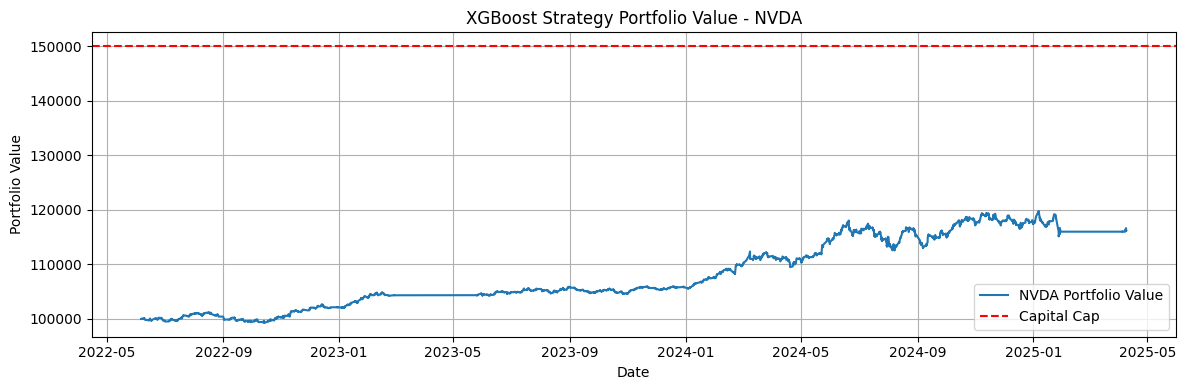

In [17]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Ensure feature columns are present
feature_columns = ['SMA_20', 'STD_20', 'Upper_Band', 'Lower_Band', 'Stoch']
missing = [f for f in feature_columns if f not in df.columns]
if missing:
    raise ValueError(f"Missing features: {missing}")

Fix Target Labels to Match XGBoost Expectation
df['Target_XGB'] = df['Target'].map({-1: 2, 0: 0, 1: 1})  Convert to 0=Hold, 1=Buy, 2=Sell for multi:softmax

Prepare training data
X = df[feature_columns]
y = df['Target_XGB']

Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

Attempt GPU training with XGBoost
try:
    gb_model = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    objective='multi:softmax',
    num_class=3,
    eval_metric='mlogloss',
    use_label_encoder=False,
    device='cuda'  Use this instead of gpu_hist and gpu_predictor
    )
    gb_model.fit(X_train, y_train)
    print("XGBoost Gradient Boosting (GPU) model trained.")
except Exception as e:
    print(f" GPU training failed. Switching to CPU. Reason: {e}")
    gb_model = GradientBoostingClassifier(n_estimators=200, random_state=42)
    gb_model.fit(X_train, y_train)

Evaluate Accuracy
y_pred = gb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Gradient Boosting Accuracy: {accuracy:.4f}")

Portfolio Simulation for All Stocks
capital_start = 100000
gb_results = []

for symbol in df['Symbol'].unique():
    df_symbol = df[df['Symbol'] == symbol].copy()
    try:
        X_pred = df_symbol[feature_columns].shift(1).bfill()
        df_symbol['Trade_Signal_GB'] = gb_model.predict(X_pred)
    except Exception as e:
        print(f"Skipping {symbol}: prediction failed - {e}")
        continue

    Re-map signal: 0=Hold, 1=Buy, 2=Sell → -1/0/1
    df_symbol['Trade_Signal_GB'] = df_symbol['Trade_Signal_GB'].map({0: 0, 1: 1, 2: -1}).fillna(0)

    capital = capital_start
    shares = 0
    buy_price = None
    trade_size = 0.05
    portfolio_values = []

    for i, signal in enumerate(df_symbol['Trade_Signal_GB']):
        price = df_symbol['Close'].iloc[i]
        if signal == 1 and capital >= price and buy_price is None:
            amount = capital * trade_size
            shares = amount // price
            if capital - (shares * price) >= 0:
                buy_price = price
                capital -= shares * price
        elif signal == -1 and shares > 0:
            capital += shares * price
            shares = 0
            buy_price = None
        portfolio_value = capital + (shares * price)
        portfolio_values.append(portfolio_value)

    result_df = pd.DataFrame({
        'Datetime': df_symbol['Datetime'].values,
        'Portfolio Value': portfolio_values
    })

    result_df['Daily Return'] = result_df['Portfolio Value'].pct_change().fillna(0)
    cumulative_return = ((result_df['Portfolio Value'].iloc[-1] / capital_start) - 1) * 100
    sharpe = (
        result_df['Daily Return'].mean() / result_df['Daily Return'].std() * np.sqrt(252)
        if result_df['Daily Return'].std() != 0 else 0
    )
    drawdown = (
        (pd.Series(portfolio_values).cummax() - pd.Series(portfolio_values)) /
        pd.Series(portfolio_values).cummax()
    )
    max_drawdown = drawdown.max() * 100

    gb_results.append({
        'Symbol': symbol,
        'Final_Portfolio': result_df['Portfolio Value'].iloc[-1],
        'Cumulative_Return_%': cumulative_return,
        'Sharpe': sharpe,
        'Max_Drawdown_%': max_drawdown
    })

Save Results
gb_summary = pd.DataFrame(gb_results)
gb_summary.to_csv("gradient_boosting_strategy_evaluation_summary.csv", index=False)

Display Top Results
print("\n Gradient Boosting Multi-Stock Evaluation Complete:")
print(gb_summary.sort_values(by="Final_Portfolio", ascending=False).head())

Plot Top Performer
top_symbol = gb_summary.sort_values(by="Final_Portfolio", ascending=False).iloc[0]['Symbol']
df_top = df[df['Symbol'] == top_symbol].copy()
X_pred_top = df_top[feature_columns].shift(1).bfill()
df_top['Trade_Signal_GB'] = pd.Series(gb_model.predict(X_pred_top), index=df_top.index).map({0: 0, 1: 1, 2: -1}).fillna(0)

Rebuild portfolio values
capital = capital_start
shares = 0
buy_price = None
portfolio_values = []

for i, signal in enumerate(df_top['Trade_Signal_GB']):
    price = df_top['Close'].iloc[i]
    if signal == 1 and capital >= price and buy_price is None:
        amount = capital * trade_size
        shares = amount // price
        if capital - (shares * price) >= 0:
            buy_price = price
            capital -= shares * price
    elif signal == -1 and shares > 0:
        capital += shares * price
        shares = 0
        buy_price = None
    portfolio_value = capital + (shares * price)
    portfolio_values.append(portfolio_value)

Plot
plt.figure(figsize=(12, 4))
plt.plot(df_top['Datetime'].values, portfolio_values, label=f'{top_symbol} Portfolio Value')
plt.axhline(150000, color='red', linestyle='--', label='Capital Cap')
plt.title(f'XGBoost Strategy Portfolio Value - {top_symbol}')
plt.xlabel("Date")
plt.ylabel("Portfolio Value")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
